In [2]:
import pandas as pd

In [3]:
cforum = pd.read_csv('Cforum_2016.csv')
aforum = pd.read_csv('Aforum_2016.csv')


Merging Aforum and Cforum into a single dataframe: df and adding a column 'Forum' to show forum name.

In [4]:
df = pd.concat([cforum, aforum])
df

,Link,Date,Username,Message,Country,Like,Topic,Thread,Message_lowercase,Message_no_quotes,month_year,Message_nopunct
0,https://www.canadavisa.com//canada-immigration...,2019-09-30 00:00:00,Prashant-Canada,I’m filing Switzerland Visa for my family as ...,NaN,0,Visa Offices in Europe\nNew,Schengen VISA,i’m filing switzerland visa for my family as a...,i’m filing switzerland visa for my family as a...,2019-09,NaN
1,https://www.canadavisa.com//canada-immigration...,2019-06-11 00:00:00,spanishnick,"Hi,<br/><br/>My aunt and uncle applied for a t...",NaN,0,Visa Offices in Europe\nNew,Visa from Paris,"hi,<br/><br/>my aunt and uncle applied for a t...","hi,<br/><br/>my aunt and uncle applied for a t...",2019-06,NaN
2,https://www.canadavisa.com//canada-immigration...,2020-01-22 00:00:00,Junaid yasin,I need job in canda,NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,i need job in canda,i need job in canda,2020-01,NaN
3,https://www.canadavisa.com//canada-immigration...,2020-01-22 00:00:00,Junaid yasin,"<blockquote class=""bbCodeBlock bbCodeBlock--ex...",NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,"<blockquote class=""bbcodeblock bbcodeblock--ex...","<a class=""link link--internal"" href=""https://w...",2020-01,NaN
4,https://www.canadavisa.com//canada-immigration...,2020-01-23 00:00:00,canuck_in_uk,can possible without IELTS test LMIA i am from...,NaN,1,Visa Offices in Europe\nNew,Need job and visa in canda,can possible without ielts test lmia i am from...,can possible without ielts test lmia i am from...,2020-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
106452,https://www.australiaforum.com/visas-immigrati...,2016-01-02 03:24:00,xenaclaire86,\r\n\t\t\t\r\n\t\t\tThanks for the replies mat...,NaN,0,Visas and immigration,Student visa to spouse visa 820,thanks for the replies mates. cancellation mea...,NaN,NaN,thanks for the replies mates cancellation mean...
106453,https://www.australiaforum.com/visas-immigrati...,2016-01-01 02:51:00,sunflowerhk,\r\n\t\t\t\r\n\t\t\tA few questions about how ...,hong_kong,0,Visas and immigration,RRV/citizenship requirements,a few questions about how to get rrv or citize...,NaN,NaN,a few questions about how to get rrv or citize...
106454,https://www.australiaforum.com/visas-immigrati...,2016-01-01 04:39:00,Maggie-May24,\r\n\t\t\t\r\n\t\t\tYou can find information a...,canada,1522,Visas and immigration,RRV/citizenship requirements,you can find information about both rrvs and c...,NaN,NaN,you can find information about both rrvs and c...
106455,https://www.australiaforum.com/visas-immigrati...,2016-01-01 03:14:00,Tahir1980,\r\n\t\t\t\r\n\t\t\tI have applied for 189 vis...,pakistan,0,Visas and immigration,Medical of newborn,i have applied for 189 visa. i am primary appl...,NaN,NaN,i have applied for 189 visa i am primary appli...


In [5]:
aforum['forum'] = pd.Series(['Aforum' for x in range(len(df.index))])
cforum['forum'] = pd.Series(['Cforum' for x in range(len(df.index))])


In [6]:
df = pd.concat([cforum, aforum])

Adding a year column.

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors="coerce")
df['Date'].values.astype('datetime64[Y]')
df['year'] =  pd.DatetimeIndex(df['Date']).year

In [8]:
df['year']

0         2019.0
1         2019.0
2         2020.0
3         2020.0
4         2020.0
           ...  
106452    2016.0
106453    2016.0
106454    2016.0
106455    2016.0
106456    2016.0
Name: year, Length: 200669, dtype: float64

Cleaning messages. Some inconistencies with the 2 datasets. So need to do a fresh cleanup. 

In [9]:
df = df.drop(columns=['Message_lowercase','Message_nopunct', 'Message_no_quotes'])
df.columns

Index(['Link', 'Date', 'Username', 'Message', 'Country', 'Like', 'Topic',
       'Thread', 'month_year', 'forum', 'year'],
      dtype='object')

 "blockquote" represents duplicate messages. Need to remove from all messages.

In [10]:
df = df[df['Message'].notnull()]


In [11]:
#coverting first to lowercase
df['Message_lowercase'] = df['Message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()


,Link,Date,Username,Message,Country,Like,Topic,Thread,month_year,forum,year,Message_lowercase
0,https://www.canadavisa.com//canada-immigration...,2019-09-30,Prashant-Canada,I’m filing Switzerland Visa for my family as ...,NaN,0,Visa Offices in Europe\nNew,Schengen VISA,2019-09,Cforum,2019.0,i’m filing switzerland visa for my family as a...
1,https://www.canadavisa.com//canada-immigration...,2019-06-11,spanishnick,"Hi,<br/><br/>My aunt and uncle applied for a t...",NaN,0,Visa Offices in Europe\nNew,Visa from Paris,2019-06,Cforum,2019.0,"hi,<br/><br/>my aunt and uncle applied for a t..."
2,https://www.canadavisa.com//canada-immigration...,2020-01-22,Junaid yasin,I need job in canda,NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,i need job in canda
3,https://www.canadavisa.com//canada-immigration...,2020-01-22,Junaid yasin,"<blockquote class=""bbCodeBlock bbCodeBlock--ex...",NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,"<blockquote class=""bbcodeblock bbcodeblock--ex..."
4,https://www.canadavisa.com//canada-immigration...,2020-01-23,canuck_in_uk,can possible without IELTS test LMIA i am from...,NaN,1,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,can possible without ielts test lmia i am from...


In [ ]:
#creating a function to remove messages stored in blockquote
#from bs4 import BeautifulSoup as bs

#def deblock(message):
 #   mbs = bs(message, 'html.parser')
  #  for bq in mbs.findAll('blockquote'):
   #     bq.decompose()
    #return str(mbs)

LM's insertions

In [12]:
#creating a function to remove messages stored in blockquote
from bs4 import BeautifulSoup as bs

def deblock_lm(message):
    mbs = bs(message, 'html.parser')
    for bq in mbs.findAll('blockquote'):
        bq.decompose()
    # Note this change
    return mbs.text

In [13]:
df['Message_no_quotes'] = df['Message_lowercase'].apply(lambda x: deblock_lm(x))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.change.org/p/minister-of-immigration-diversity-and-inclusiveness-quebec-online-fraud-by-midi-new-rule-must-not-be-applicable-to-applicants-before-8th-march-2017?recruiter=693592760&amp;utm_source=share_petition&amp;utm_medium=copylink" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://chat.whatsapp.com/j9gfjmrxenxljmniqaiykx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.frame

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:332: MarkupResemblesLocatorWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.thestar.com/news/immigration/2016/08/18/ottawas-new-air-travel-rule-catches-dual-citizens-by-surprise.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "http://www.cic.gc.ca/english/work/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://immi.homeaffairs.gov.au/visa...n-graduate-476" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.modernghana.com/amp/news...rom%20%251%24s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.vetassess.com.au/portals...tylecturer.pdf" looks like a URL. Beautiful Soup i

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.homeaffairs.gov.au/trav/...ans-fact-sheet" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.ombudsman.gov.au/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.change.org/p/peter-dutto..._starters_page" looks like a URL. Beautiful Soup is not an HTTP client. Yo

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.homeaffairs.gov.au/trav/...500-?modal=wet" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.border.gov.au/trav/visa/...h-declarations" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.homeaffairs.gov.au/trav/...#tab-content-2" looks like a URL. Beautiful Soup i

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "http://www.australiaforum.com/visas-...tml#post487698" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.border.gov.au/about/acce...ocessing-times" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://www.dropbox.com/s/vknty5pvj9...visa.docx?dl=0" looks like a URL. Beautiful Soup i

In [14]:
df['Message_no_quotes'].head()

0    i’m filing switzerland visa for my family as a...
1    hi,my aunt and uncle applied for a tourist vis...
2                                  i need job in canda
3    https://www.canadavisa.com/canada-immigration-...
4    can possible without ielts test lmia i am from...
Name: Message_no_quotes, dtype: object

In [15]:
#removing punct
import string
#widen the column
pd.set_option('display.max_colwidth', 100)

df['Message_punct'] = df['Message_no_quotes'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

df.head()

,Link,Date,Username,Message,Country,Like,Topic,Thread,month_year,forum,year,Message_lowercase,Message_no_quotes,Message_punct
0,https://www.canadavisa.com//canada-immigration-discussion-board/threads/schengen-visa.656723/pos...,2019-09-30,Prashant-Canada,I’m filing Switzerland Visa for my family as a tourist .<br/><br/><br/><ul><li data-xf-list-typ...,NaN,0,Visa Offices in Europe\nNew,Schengen VISA,2019-09,Cforum,2019.0,i’m filing switzerland visa for my family as a tourist .<br/><br/><br/><ul><li data-xf-list-type...,i’m filing switzerland visa for my family as a tourist .i have an appointment for finger printin...,i’m filing switzerland visa for my family as a tourist i have an appointment for finger printing...
1,https://www.canadavisa.com//canada-immigration-discussion-board/threads/visa-from-paris.636790/p...,2019-06-11,spanishnick,"Hi,<br/><br/>My aunt and uncle applied for a tourist visa at the Canadian embassy in Paris more ...",NaN,0,Visa Offices in Europe\nNew,Visa from Paris,2019-06,Cforum,2019.0,"hi,<br/><br/>my aunt and uncle applied for a tourist visa at the canadian embassy in paris more ...","hi,my aunt and uncle applied for a tourist visa at the canadian embassy in paris more than five ...",himy aunt and uncle applied for a tourist visa at the canadian embassy in paris more than five w...
2,https://www.canadavisa.com//canada-immigration-discussion-board/threads/need-job-and-visa-in-can...,2020-01-22,Junaid yasin,I need job in canda,NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,i need job in canda,i need job in canda,i need job in canda
3,https://www.canadavisa.com//canada-immigration-discussion-board/threads/need-job-and-visa-in-can...,2020-01-22,Junaid yasin,"<blockquote class=""bbCodeBlock bbCodeBlock--expandable bbCodeBlock--quote""><div class=""bbCodeBlo...",NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,"<blockquote class=""bbcodeblock bbcodeblock--expandable bbcodeblock--quote""><div class=""bbcodeblo...",https://www.canadavisa.com/canada-immigration-discussion-board/threads/need-job.674699/,httpswwwcanadavisacomcanadaimmigrationdiscussionboardthreadsneedjob674699
4,https://www.canadavisa.com//canada-immigration-discussion-board/threads/need-job-and-visa-in-can...,2020-01-23,canuck_in_uk,can possible without IELTS test LMIA i am from Pakistan but working Saudi Arabia on Riyadh Metro...,NaN,1,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,can possible without ielts test lmia i am from pakistan but working saudi arabia on riyadh metro...,can possible without ielts test lmia i am from pakistan but working saudi arabia on riyadh metro...,can possible without ielts test lmia i am from pakistan but working saudi arabia on riyadh metro...


Using string.printable to filter out special chars. 

In [16]:
#df.Message_punct.str.replace('[^a-zA-Z]', '')

from string import printable
st = set(printable)

df['Message_punct'] = df["Message_punct"].apply(lambda x: ''.join([" " if  i not in  st else i for i in x]))

In [17]:
df['Message_punct'].head()

0    i m filing switzerland visa for my family as a tourist i have an appointment for finger printing...
1    himy aunt and uncle applied for a tourist visa at the canadian embassy in paris more than five w...
2                                                                                    i need job in canda
3                              httpswwwcanadavisacomcanadaimmigrationdiscussionboardthreadsneedjob674699
4    can possible without ielts test lmia i am from pakistan but working saudi arabia on riyadh metro...
Name: Message_punct, dtype: object

In [18]:
#The dtm has several non-english words
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('words')
words = df['Message_punct']
words.head()

[nltk_data] Downloading package words to
[nltk_data]     /Users/marinakhan/nltk_data...
[nltk_data]   Package words is already up-to-date!


0    i m filing switzerland visa for my family as a tourist i have an appointment for finger printing...
1    himy aunt and uncle applied for a tourist visa at the canadian embassy in paris more than five w...
2                                                                                    i need job in canda
3                              httpswwwcanadavisacomcanadaimmigrationdiscussionboardthreadsneedjob674699
4    can possible without ielts test lmia i am from pakistan but working saudi arabia on riyadh metro...
Name: Message_punct, dtype: object

In [19]:
df.head()

,Link,Date,Username,Message,Country,Like,Topic,Thread,month_year,forum,year,Message_lowercase,Message_no_quotes,Message_punct
0,https://www.canadavisa.com//canada-immigration-discussion-board/threads/schengen-visa.656723/pos...,2019-09-30,Prashant-Canada,I’m filing Switzerland Visa for my family as a tourist .<br/><br/><br/><ul><li data-xf-list-typ...,NaN,0,Visa Offices in Europe\nNew,Schengen VISA,2019-09,Cforum,2019.0,i’m filing switzerland visa for my family as a tourist .<br/><br/><br/><ul><li data-xf-list-type...,i’m filing switzerland visa for my family as a tourist .i have an appointment for finger printin...,i m filing switzerland visa for my family as a tourist i have an appointment for finger printing...
1,https://www.canadavisa.com//canada-immigration-discussion-board/threads/visa-from-paris.636790/p...,2019-06-11,spanishnick,"Hi,<br/><br/>My aunt and uncle applied for a tourist visa at the Canadian embassy in Paris more ...",NaN,0,Visa Offices in Europe\nNew,Visa from Paris,2019-06,Cforum,2019.0,"hi,<br/><br/>my aunt and uncle applied for a tourist visa at the canadian embassy in paris more ...","hi,my aunt and uncle applied for a tourist visa at the canadian embassy in paris more than five ...",himy aunt and uncle applied for a tourist visa at the canadian embassy in paris more than five w...
2,https://www.canadavisa.com//canada-immigration-discussion-board/threads/need-job-and-visa-in-can...,2020-01-22,Junaid yasin,I need job in canda,NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,i need job in canda,i need job in canda,i need job in canda
3,https://www.canadavisa.com//canada-immigration-discussion-board/threads/need-job-and-visa-in-can...,2020-01-22,Junaid yasin,"<blockquote class=""bbCodeBlock bbCodeBlock--expandable bbCodeBlock--quote""><div class=""bbCodeBlo...",NaN,0,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,"<blockquote class=""bbcodeblock bbcodeblock--expandable bbcodeblock--quote""><div class=""bbcodeblo...",https://www.canadavisa.com/canada-immigration-discussion-board/threads/need-job.674699/,httpswwwcanadavisacomcanadaimmigrationdiscussionboardthreadsneedjob674699
4,https://www.canadavisa.com//canada-immigration-discussion-board/threads/need-job-and-visa-in-can...,2020-01-23,canuck_in_uk,can possible without IELTS test LMIA i am from Pakistan but working Saudi Arabia on Riyadh Metro...,NaN,1,Visa Offices in Europe\nNew,Need job and visa in canda,2020-01,Cforum,2020.0,can possible without ielts test lmia i am from pakistan but working saudi arabia on riyadh metro...,can possible without ielts test lmia i am from pakistan but working saudi arabia on riyadh metro...,can possible without ielts test lmia i am from pakistan but working saudi arabia on riyadh metro...


In [20]:
df.to_csv('ACcombined.csv', index=False)

KeyboardInterrupt: 

In [21]:
len(df)

200669

In [ ]:
import pickle
df.to_pickle("corpus.pkl")

Message_punct is the cleaned column to work with (still might need some cleaning)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df['Message_punct'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
data_dtm

In [ ]:
data_dtm.to_pickle("corpus2.pkl")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df['Message_punct'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
#data_dtm

This is the complete dtm for use. first few iters had lots of non-english chars so tried re.sub but didnt work. The string.printable method seems to work. Pickling results in dead kernel every time. 

## Exploratory Data Analysis

Time Series Analysis

In [20]:
data = pd.read_pickle('corpus.pkl')

Creating and pickling slices of data by forum and year to compare over time. 

In [21]:

import matplotlib.pyplot as plt

In [22]:
ts = df.groupby('year', as_index=False).count()
ts

,year,Link,Date,Username,Message,Country,Like,Topic,Thread,month_year,forum,Message_lowercase,Message_no_quotes,Message_punct
0,2016.0,40634,40634,40628,40634,24873,40628,40628,40628,15342,40634,40634,40634,40634
1,2017.0,51747,51747,51699,51747,29701,51747,51747,51747,21974,51747,51747,51747,51747
2,2018.0,55603,55603,55598,55603,22051,55603,55603,55603,26416,55603,55603,55603,55603
3,2019.0,43476,43476,43469,43476,10877,43476,43476,43476,24872,43476,43476,43476,43476
4,2020.0,9022,9022,9022,9022,1773,9022,9022,9022,5510,9022,9022,9022,9022


No handles with labels found to put in legend.


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

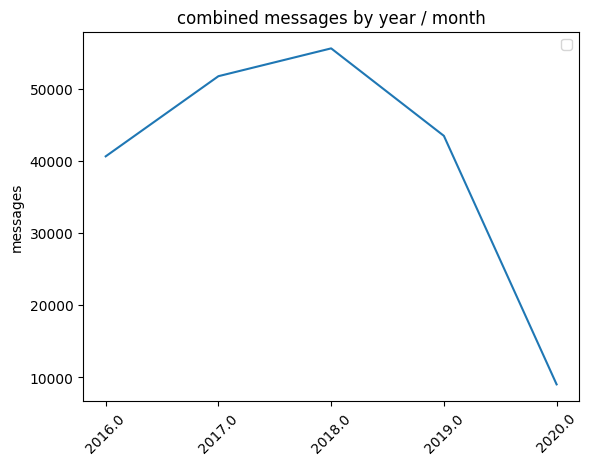

In [23]:
plt.rcdefaults()
fig, ax = plt.subplots()
width = 0.35

ax.plot(ts['year'].astype(str), ts['Message'])

ax.legend()
ax.set_ylabel('messages')
ax.set_title('combined messages by year / month')
plt.xticks(rotation=45)

#plt.show()

In [24]:
cforum['d'] = pd.to_datetime(cforum['Date'], errors="coerce")
cforum['month_year'] = cforum['d'].dt.to_period('M')
cforum['year'] = pd.DatetimeIndex(cforum['d']).year
#cforum['year']
aforum['d'] = pd.to_datetime(aforum['Date'])
aforum['month_year'] = aforum['d'].dt.to_period('M')
aforum['year'] = aforum['d'].dt.year
aforum['year']

0         2017.0
1         2020.0
2         2020.0
3         2020.0
4         2020.0
           ...  
106452    2016.0
106453    2016.0
106454    2016.0
106455    2016.0
106456    2016.0
Name: year, Length: 106457, dtype: float64

In [25]:
tsC = cforum.groupby('year', as_index=False).count()
#tsC
tsA = aforum.groupby('year', as_index=False).count()
tsA

,year,Link,Date,Username,Message,Country,Like,Topic,Thread,Message_lowercase,Message_nopunct,forum,d,month_year
0,2016.0,25292,25292,25292,25292,24873,25292,25292,25292,25290,25277,25292,25292,25292
1,2017.0,29773,29773,29773,29773,29701,29773,29773,29773,29772,29739,29773,29773,29773
2,2018.0,29187,29187,29187,29187,22051,29187,29187,29187,29186,29165,29187,29187,29187
3,2019.0,18604,18604,18599,18604,10877,18604,18604,18604,18604,18595,18604,18604,18604
4,2020.0,3512,3512,3512,3512,1773,3512,3512,3512,3512,3512,3512,3512,3512


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

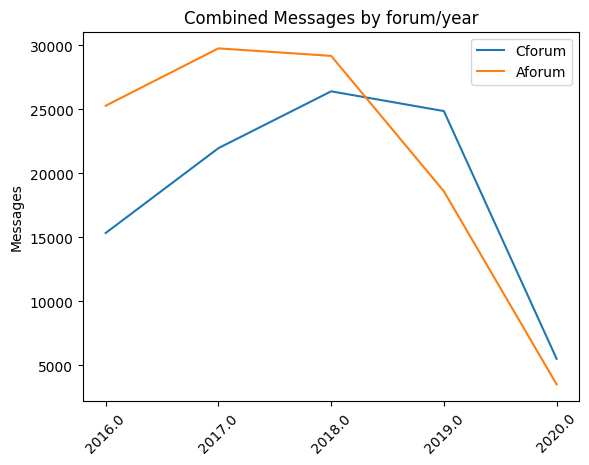

In [26]:
plt.rcdefaults()
fig, ax = plt.subplots()
width = 0.35

ax.plot(tsC['year'].astype(str), tsC['Message'], label='Cforum')
ax.plot(tsA['year'].astype(str), tsA['Message'], label='Aforum')

ax.legend()
ax.set_ylabel('Messages')
ax.set_title('Combined Messages by forum/year')
plt.xticks(rotation=45)

#plt.show()

Word Frequencies

In [22]:
# Download stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marinakhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df['Message_nostop'] = df['Message_punct'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [24]:
commonwords = pd.Series(' '.join(df.Message_nostop).split()).value_counts()[:20]
commonwords

visa           123056
application     67661
get             47845
would           45726
months          44916
posted          43702
quote           43530
originally      42184
time            40957
need            35472
australia       34617
apply           34341
partner         31738
hi              31587
one             31248
know            29112
thanks          28914
applied         27635
got             27334
also            26158
dtype: int64

In [30]:
words = df['Message_nostop']
words

0         filing switzerland visa family tourist appointment finger printing personal interview oct 15th 2...
1         himy aunt uncle applied tourist visa canadian embassy paris five weeks ago gave biometric inform...
2                                                                                              need job canda
3                                   httpswwwcanadavisacomcanadaimmigrationdiscussionboardthreadsneedjob674699
4         possible without ielts test lmia pakistan working saudi arabia riyadh metro project assist whats...
                                                         ...                                                 
106452    thanks replies mates cancellation means case school would report husband paying fees accordingly...
106453    questions get rrv citizenship 1 want get rrv citizenship necessary find local jobs ie within aus...
106454    find information rrvs citizenship dibp website application process australian citizenship reside...
106455    

In [31]:
from collections import Counter
x = Counter(" ".join(words).split()).most_common(100)
freq = pd.DataFrame(x, columns=['Word', 'Frequency'])
print(freq)

           Word  Frequency
0          visa     123056
1   application      67661
2           get      47845
3         would      45726
4        months      44916
..          ...        ...
95      already      11208
96         make      11195
97    applicant      11026
98  citizenship      11001
99         2017      10885

[100 rows x 2 columns]


Phrases

In [32]:
from nltk import ngrams
vals = [y for x in df['Message_nostop'] for y in x.split()]
n = [4,5,6]
a = pd.Series([' '.join(y) for x in n for y in ngrams(vals, x)]).value_counts()[:100]
print (a)

quote originally posted ampk                               1627
quote originally posted mish                               1483
thanks quote originally posted                             1299
quote originally posted ccms                               1253
quote originally posted jande                              1235
                                                           ... 
quote originally posted tijanaoc                            152
receipt applications study book                             152
applications study book called                              151
correspondence acknowledging receipt applications study     151
acknowledging receipt applications study                    151
Length: 100, dtype: int64


In [33]:
from nltk import bigrams

terms = df['Message_nostop'].apply(lambda row: list(nltk.bigrams(row.split(' '))))

terms.head()

0    [(filing, switzerland), (switzerland, visa), (visa, family), (family, tourist), (tourist, appoin...
1    [(himy, aunt), (aunt, uncle), (uncle, applied), (applied, tourist), (tourist, visa), (visa, cana...
2                                                                            [(need, job), (job, canda)]
3                                                                                                     []
4    [(possible, without), (without, ielts), (ielts, test), (test, lmia), (lmia, pakistan), (pakistan...
Name: Message_nostop, dtype: object

In [34]:
# Flatten list of bigrams
import itertools
import collections
bigrams = list(itertools.chain(*terms))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(1000)

[(('originally', 'posted'), 41586),
 (('quote', 'originally'), 41575),
 (('partner', 'visa'), 14234),
 (('visa', 'application'), 7467),
 (('bridging', 'visa'), 7130),
 (('tourist', 'visa'), 6792),
 (('12', 'months'), 6723),
 (('visitor', 'visa'), 5852),
 (('student', 'visa'), 5145),
 (('3', 'months'), 5011),
 (('migration', 'agent'), 4984),
 (('2', 'years'), 4826),
 (('visa', 'granted'), 4545),
 (('6', 'months'), 4407),
 (('processing', 'time'), 4238),
 (('case', 'officer'), 4088),
 (('dont', 'know'), 4011),
 (('still', 'waiting'), 3964),
 (('good', 'luck'), 3932),
 (('de', 'facto'), 3727),
 (('police', 'check'), 3518),
 (('would', 'like'), 3460),
 (('work', 'permit'), 3390),
 (('hi', 'everyone'), 3163),
 (('registered', 'migration'), 2989),
 (('thank', 'much'), 2908),
 (('immi', 'account'), 2900),
 (('processing', 'times'), 2838),
 (('make', 'sure'), 2768),
 (('3', 'years'), 2660),
 (('hi', 'guys'), 2610),
 (('thanks', 'advance'), 2564),
 (('work', 'experience'), 2528),
 (('5', 'years

In [35]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(originally, posted)",41586
1,"(quote, originally)",41575
2,"(partner, visa)",14234
3,"(visa, application)",7467
4,"(bridging, visa)",7130
...,...,...
95,"(last, week)",1307
96,"(prospective, marriage)",1304
97,"(online, application)",1300
98,"(looks, like)",1279


# Visualise


In [36]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')


In [37]:
import networkx as nx

In [38]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


In [1]:
fig, ax = plt.subplots(figsize=(50, 48))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
docs = df['Message_nostop']
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
X[X > 0] = 1 # run this line if you don't want extra within-text cooccurence (see below)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format

## Initial Findings
Just exploring the top 200 words in both forums - common words include 'application', 'work', 'wait'. 
But there are some words that are somewhat unique to each forum - such as 'relationship', 'partner' and '309' in Australia -- all referring to partner visas which is what a large number of conversations are about. 
For Cforum, words like 'permit', 'card' and 'letter' appear more frequently, referring to employment and work permits, and work experience letters. 



## Sentiment Analysis

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['Message_punct'].apply(pol)
df['subjectivity'] = df['Message_punct'].apply(sub)
df.head()

In [ ]:
#compute sentiment scores (polarity) per message from 2016

sentiment_scores_tb = [round(TextBlob(messages).sentiment.polarity, 3) for messages in df['Message_punct']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

#add column with sentiment category (positive/negative/neutral) - based on the Textblob library. 

df['sentiment'] = sentiment_category_tb 


In [ ]:
df.head()

Total no. of postive, negative & neutral messages and their comparative percentages across both forums

In [ ]:

PositiveSent = df.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(df)*100
print(pctPos)
NegativeSent = df.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(df)*100
print(pctNeg)
NeutralSent = df.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(df)*100
print(pctNeut)

import matplotlib.pyplot as plt

labels = 'positive', 'negative', 'neutral'
sizes = [pctPos, pctNeg, pctNeut]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

## Sentiment by forum
Couldnt figure out a more elegant way to do this. 

In [ ]:
PositiveSent = dfA.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(dfA)*100
print(pctPos)
NegativeSent = dfA.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(dfA)*100
print(pctNeg)
NeutralSent = dfA.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(dfA)*100
print(pctNeut)

import matplotlib.pyplot as plt

labels = 'positive', 'negative', 'neutral'
sizes = [pctPos, pctNeg, pctNeut]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [ ]:
PositiveSent = dfC.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(dfC)*100
print(pctPos)
NegativeSent = dfC.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(dfC)*100
print(pctNeg)
NeutralSent = dfC.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(dfC)*100
print(pctNeut)

import matplotlib.pyplot as plt

labels = 'positive', 'negative', 'neutral'
sizes = [pctPos, pctNeg, pctNeut]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

## Sentiment by Year

For each year compute the sentiment for Aforum and Cforum. Again - I think there would be a more elegant way to do this. I have just sorted by forum and then sliced into year groups.

Sliced this dataset but couldnt figure out the best way to use it considering all column values are uneven - i.e years = 5, forums = 2, and sentiment = 3.

In [ ]:
df_a = df[['year', 'forum', 'sentiment']]

df_a.head()



In [ ]:
y2016 = df[df.year == 2016]
PositiveSent = y2016.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2016)*100
print(pctPos)
NegativeSent = y2016.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2016)*100
print(pctNeg)
NeutralSent = y2016.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2016)*100
print(pctNeut)

y2017 = df[df.year == 2017]
PositiveSent = y2017.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2017)*100
print(pctPos)
NegativeSent = y2017.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2017)*100
print(pctNeg)
NeutralSent = y2017.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2017)*100
print(pctNeut)

y2018 = df[df.year == 2018]
PositiveSent = y2018.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2018)*100
print(pctPos)
NegativeSent = y2018.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2018)*100
print(pctNeg)
NeutralSent = y2018.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2018)*100
print(pctNeut)

y2019 = df[df.year == 2019]
PositiveSent = y2019.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2019)*100
print(pctPos)
NegativeSent = y2019.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2019)*100
print(pctNeg)
NeutralSent = y2019.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2019)*100
print(pctNeut)

y2020 = df[df.year == 2020]
PositiveSent = y2020.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2020)*100
print(pctPos)
NegativeSent = y2020.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2020)*100
print(pctNeg)
NeutralSent = y2020.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2020)*100
print(pctNeut)

In [ ]:
#Aforum
PositiveSent = y2016A.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2016A)*100
print(pctPos)
NegativeSent = y2016A.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2016A)*100
print(pctNeg)
NeutralSent = y2016A.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2016A)*100
print(pctNeut)


PositiveSent = y2017A.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2017A)*100
print(pctPos)
NegativeSent = y2017A.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2017A)*100
print(pctNeg)
NeutralSent = y2017A.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2017A)*100
print(pctNeut)


PositiveSent = y2018A.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2018A)*100
print(pctPos)
NegativeSent = y2018A.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2018A)*100
print(pctNeg)
NeutralSent = y2018A.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2018A)*100
print(pctNeut)


PositiveSent = y2019A.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2019A)*100
print(pctPos)
NegativeSent = y2019A.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2019A)*100
print(pctNeg)
NeutralSent = y2019A.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2019A)*100
print(pctNeut)


PositiveSent = y2020A.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2020A)*100
print(pctPos)
NegativeSent = y2020A.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2020A)*100
print(pctNeg)
NeutralSent = y2020A.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2020A)*100
print(pctNeut)

Nothing interesting happening with sentiments over year in Aforum. Pretty consistent over time. 

In [ ]:
#Cforum

PositiveSent = y2016C.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2016C)*100
print(pctPos)
NegativeSent = y2016C.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2016C)*100
print(pctNeg)
NeutralSent = y2016C.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2016C)*100
print(pctNeut)


PositiveSent = y2017C.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2017C)*100
print(pctPos)
NegativeSent = y2017C.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2017C)*100
print(pctNeg)
NeutralSent = y2017C.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2017C)*100
print(pctNeut)


PositiveSent = y2018C.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2018C)*100
print(pctPos)
NegativeSent = y2018C.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2018C)*100
print(pctNeg)
NeutralSent = y2018C.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2018C)*100
print(pctNeut)


PositiveSent = y2019C.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2019C)*100
print(pctPos)
NegativeSent = y2019C.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2019C)*100
print(pctNeg)
NeutralSent = y2019C.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2019C)*100
print(pctNeut)


PositiveSent = y2020C.apply(lambda x: True if 'positive' in list(x) else False, axis=1)
numOfPositiveRows = len(PositiveSent[PositiveSent == True].index)
pctPos = numOfPositiveRows/len(y2020C)*100
print(pctPos)
NegativeSent = y2020C.apply(lambda x: True if 'negative' in list(x) else False, axis=1)
numOfNegativeRows = len(NegativeSent[NegativeSent == True].index)
pctNeg = numOfNegativeRows/len(y2020C)*100
print(pctNeg)
NeutralSent = y2020C.apply(lambda x: True if 'neutral' in list(x) else False, axis=1)
numOfNeutralRows = len(NeutralSent[NeutralSent == True].index)
pctNeut = numOfNeutralRows/len(y2020C)*100
print(pctNeut)


## Findings
Nothing interesting happening over the 5 years for forums in general or individually. The sentiment is pretty consistent throughout the years. The comparision between the two however, is interesting - i.e Aforum overall, is more positive than Cforum. (Texblob just uses averages, maybe a different sentiment analysis library would be more useful). 

In [ ]:
#top 100 words by forum - Canada

#can = df[df.forum == 'Cforum']
#can.head()

#tf_idf_vector = TfidfVectorizer(ngram_range=(1,3), max_features=100)
#tf_idf_vector.fit_transform(can['Message_lemmatized'])
#tfidf_top_100 = tf_idf_vector.get_feature_names()
#print(tfidf_top_100)

In [ ]:
#top 100 words by forum - Australia
#aus = df[df.forum == 'Aforum']
#aus.head()

#tf_idf_vector = TfidfVectorizer(ngram_range=(1,4), max_features=100)
#tf_idf_vector.fit_transform(aus['Message_lemmatized'])
#tfidf_top_100 = tf_idf_vector.get_feature_names()
#print(tfidf_top_100)

In [ ]:
#top 100 words for 2016 in Australia
#aus2016 = aus[aus.year == 2016]
#aus2016.head()

#tf_idf_vector = TfidfVectorizer(ngram_range=(1,3), max_features=100)
#tf_idf_vector.fit_transform(aus2016['Message_lemmatized'])
#fidf_top_100 = tf_idf_vector.get_feature_names()
#print(tfidf_top_100)

In [ ]:
#top 100 words by sentiment and Australia
#auspositive = aus[aus.sentiment == 'positive']

#tf_idf_vector = TfidfVectorizer(ngram_range=(1,1), max_features=100)
#tf_idf_vector.fit_transform(auspositive['Message_lemmatized'])
#tfidf_top_100 = tf_idf_vector.get_feature_names()
#rint(tfidf_top_100)


In [ ]:
#top 100 words by sentiment and Australia
#ausnegative = aus[aus.sentiment == 'negative']

#tf_idf_vector = TfidfVectorizer(ngram_range=(1,1), max_features=100)
#tf_idf_vector.fit_transform(ausnegative['Message_lemmatized'])
#tfidf_top_100 = tf_idf_vector.get_feature_names()
#print(tfidf_top_100)

#words like 'bridging', 'sorry', 'student', 'wrong' not appearing in positive sentiment dataset. 

In [ ]:
#top 100 n word phrases
#tf_idf_vector = TfidfVectorizer(ngram_range=(10,10), max_features=100)
#tf_idf_vector.fit_transform(ausnegative['Message'])
#tfidf_top_100 = tf_idf_vector.get_feature_names()
#print(tfidf_top_100)

In [ ]:
#tf_idf_vector = TfidfVectorizer(ngram_range=(4,4), max_features=100)
#tf_idf_vector.fit_transform(auspositive['Message'])
#tfidf_top_100 = tf_idf_vector.get_feature_names()
#print(tfidf_top_100)

In [ ]:
#canpositive = can[can.sentiment == 'positive']
#tf_idf_vector = TfidfVectorizer(ngram_range=(1,4), max_features=100)
#tf_idf_vector.fit_transform(canpositive['Message_lemmatized'])
#tfidf_top_100 = tf_idf_vector.get_feature_names()
#print(tfidf_top_100)

In [ ]:
#cannegative = can[can.sentiment == 'negative']
#tf_idf_vector = TfidfVectorizer(ngram_range=(3,4), max_features=100)
#tf_idf_vector.fit_transform(cannegative['Message_lemmatized'])
#tfidf_top_100 = tf_idf_vector.get_feature_names()
#rint(tfidf_top_100)



In [ ]:
#len(cannegative)

In [ ]:
#len(canpositive)

In [ ]:
#len(ausnegative)

In [ ]:
#len(auspositive)